In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("q_WebWorks_QFERGeneratorMonthlyDescriptive_Table.txt")
df["Classification"]=df["CECPlantID"].astype(str).str[0]

In [21]:
Solar = df[df["Classification"]=="S"]
Gas = df[df["Classification"]=="G"] 
Hydro = df[df["Classification"]=="H"] 
Wind = df[df["Classification"]=="W"] 
Geothermal = df[df["Classification"]=="T"]
Nuclear = df[df["Classification"]=="N"] 
Coal = df[df["Classification"]=="C"]
Biomass = df[df["Classification"]=="E"]

In [27]:
Months = np.arange(1,13)
Solar_Efficiency=[]
Wind_Efficiency=[]
Geothermal_Efficiency=[]
Hydro_Efficiency=[]
for month in Months:
    Solar_Efficiency.append(Solar[Solar["Month"]==month]["NetMWh"].sum()/Solar[Solar["Month"]==month]["Capacity"].sum())
    Wind_Efficiency.append(Wind[Wind["Month"]==month]["NetMWh"].sum()/Wind[Wind["Month"]==month]["Capacity"].sum())
    Geothermal_Efficiency.append(Geothermal[Geothermal["Month"]==month]["NetMWh"].sum()/Geothermal[Geothermal["Month"]==month]["Capacity"].sum())
    Hydro_Efficiency.append(Hydro[Hydro["Month"]==month]["NetMWh"].sum()/Hydro[Hydro["Month"]==month]["Capacity"].sum())

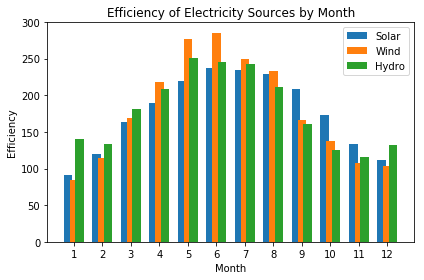

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
width = 0.3
ax.bar(Months - 2*width/3, Solar_Efficiency, width, label='Solar')
ax.bar(Months, Wind_Efficiency, width, label="Wind")
ax.bar(Months + 2*width/3, Hydro_Efficiency, width, label='Hydro')
ax.set_ylabel('Efficiency')
ax.set_xlabel('Month')
ax.set_title('Efficiency of Electricity Sources by Month')
ax.set_xticks(Months)
ax.legend()
fig.tight_layout()
plt.show()